In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import wget
import re

### *NOTE*
### To get a comprehensive dataset without downloading every single file (there's way too many), I'll adjust this code to open a specified amount of bricks from each tractor folder, and then get a specified amount of coordinates from each brick, which will ensure a range of different object locations. Also, I need to look into getting information/catalog on g, r, and i band coverage for each object (as well as photo-z possibly?) before implementing this to ensure that each object has enough imaging data

#### Also, in order to run this code on other computers, tractor_folders/, tractor_fits/, and fits_cutouts/ must be created and their paths added to the notebook

In [2]:
# download folder within tractor catalog from nersc portal, get html of folder webpage
t_url = 'http://portal.nersc.gov/project/cosmo/data/legacysurvey/dr5/tractor/000/'
t_folder = wget.download(t_url, '/Users/mac/Desktop/LBNL/DR5/tractor_folders/')
wgetfile = open(t_folder)
wgetdata = wgetfile.read()

# search html code for filenames
prog = re.compile('(?<=\.fits">).{21}')
result = prog.findall(wgetdata)

# iterate through results, download each tractor fits file
ra_dec = [] # list of tuples containing ra and dec for each object
result = result[:10] # just to test on first few files
for r in result:
    filelink = t_url + r
    t_file = wget.download(filelink, '/Users/mac/Desktop/LBNL/DR5/tractor_fits/')
    filedata = fits.open(t_file)[1].data
    for i in range(2): # just get first 5 coordinates
        ra_dec.append((filedata[i][6], filedata[i][7])) # append (ra, dec) to list

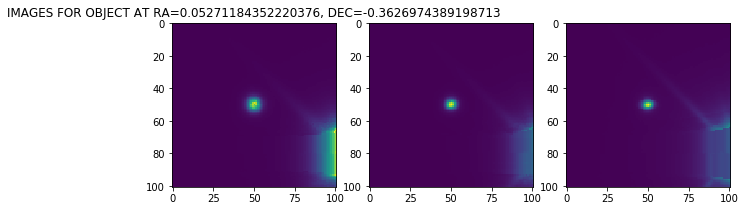

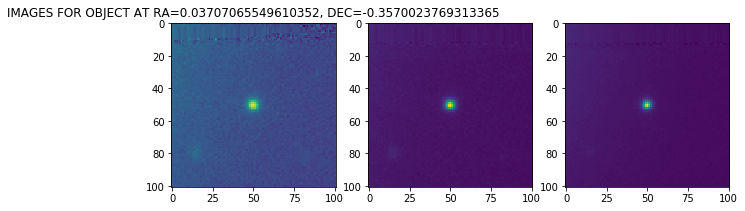

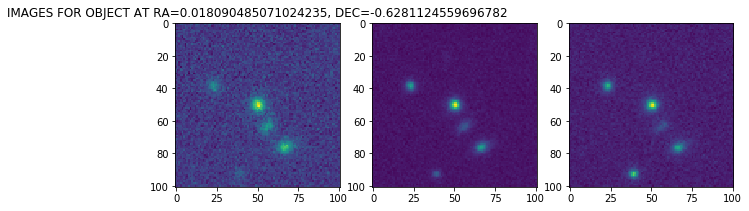

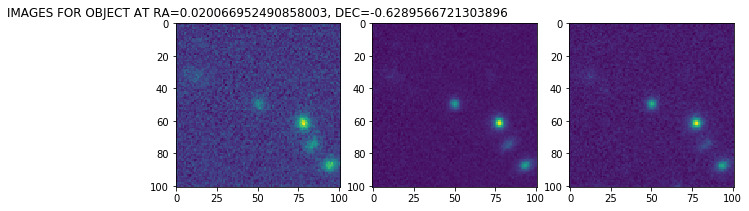

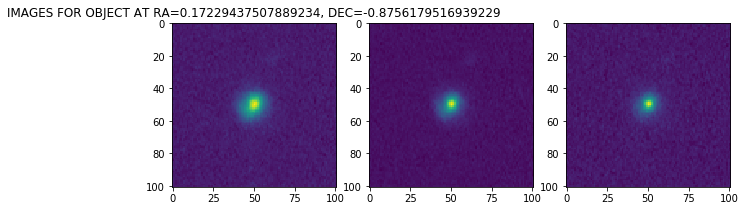

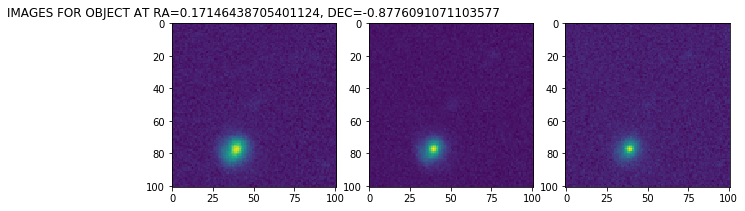

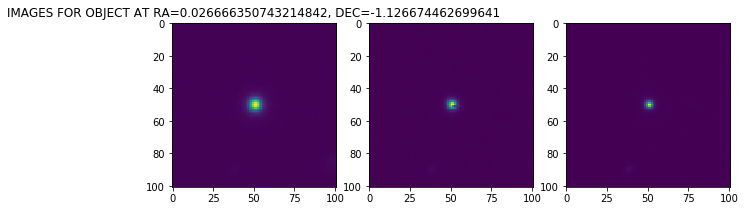

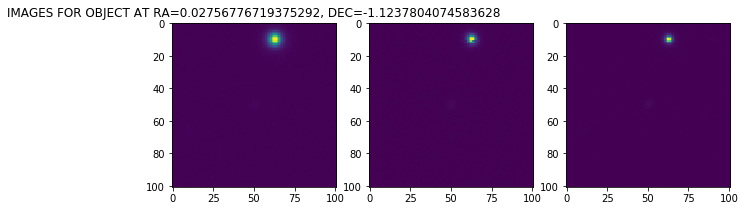

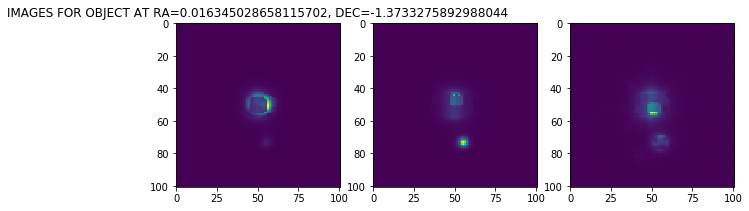

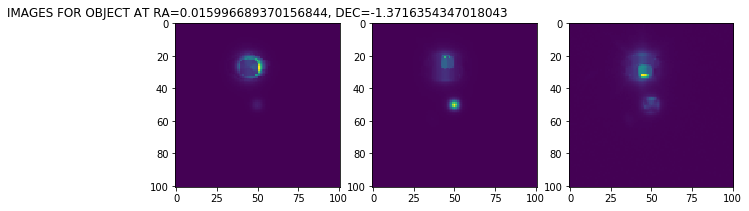

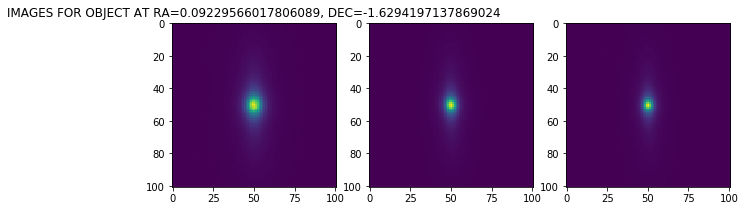

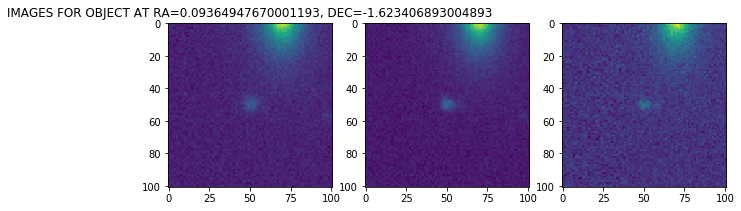

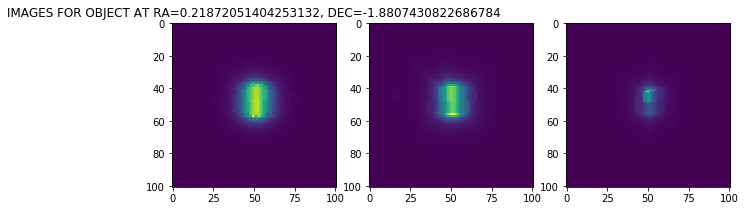

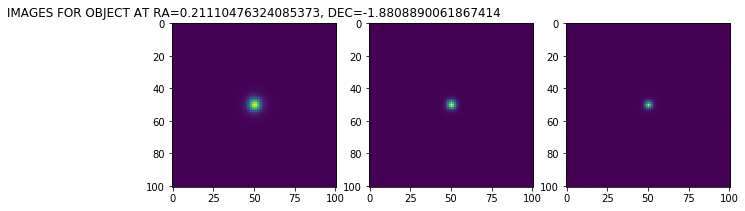

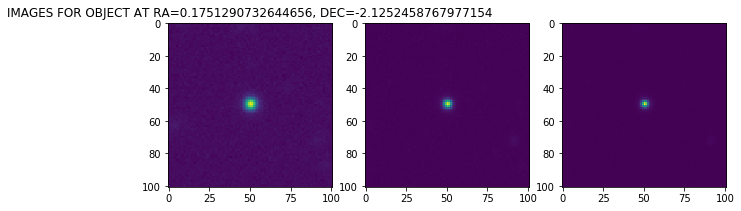

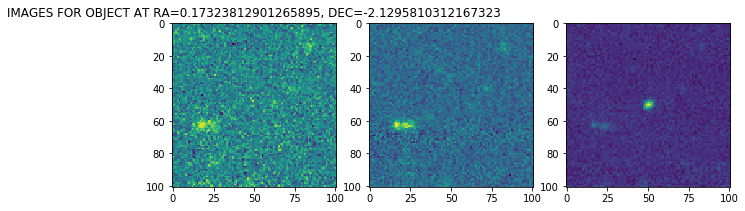

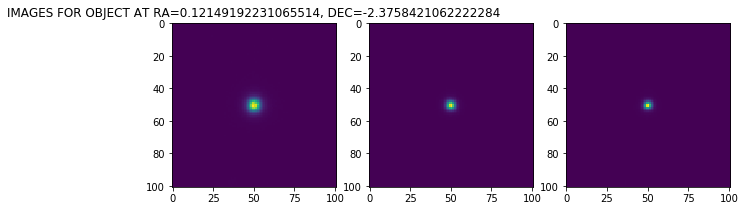

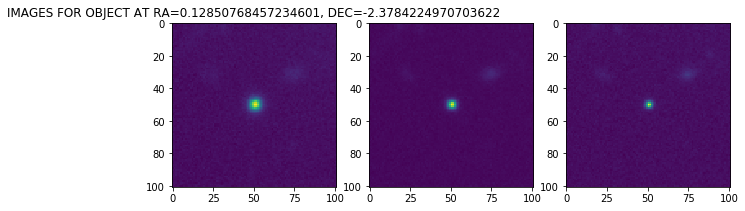

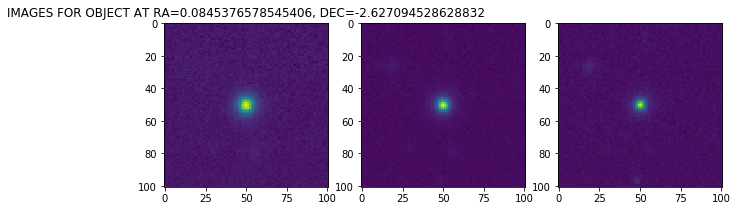

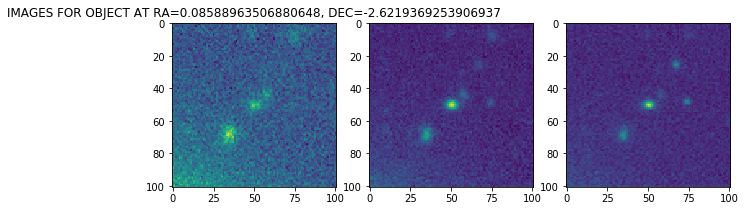

In [3]:
# iterate through ra_dec and use cutout service to obtain fits files of images centered at specified coordinates
images = []
for coor in ra_dec:
    # url specifies ra/dec as well as size (101), pixscale (0.262 is native) and layer (decals-dr5)
    url = 'http://legacysurvey.org/viewer/fits-cutout?ra={}&dec={}&size=101&layer=decals-dr5&pixscale=0.262&bands=grz'.format(coor[0], coor[1])
    filename = wget.download(url, '/Users/mac/Desktop/LBNL/DR5/fits_cutouts/')
    image = fits.open(filename)[0].data
    images.append(image)
    # plotting bands just to view how the images come out
    plt.figure(figsize=(10,7))
    plt.subplot(131)
    plt.title('IMAGES FOR OBJECT AT RA={}, DEC={}'.format(coor[0], coor[1]))
    plt.imshow(image[0,:,:])
    plt.subplot(132)
    plt.imshow(image[1,:,:])
    plt.subplot(133)
    plt.imshow(image[2,:,:])
    

In [4]:
ra_dec

[(0.052711843522203761, -0.36269743891987127),
 (0.03707065549610352, -0.35700237693133652),
 (0.018090485071024235, -0.62811245596967824),
 (0.020066952490858003, -0.62895667213038964),
 (0.17229437507889234, -0.87561795169392287),
 (0.17146438705401124, -0.87760910711035767),
 (0.026666350743214842, -1.126674462699641),
 (0.02756776719375292, -1.1237804074583628),
 (0.016345028658115702, -1.3733275892988044),
 (0.015996689370156844, -1.3716354347018043),
 (0.092295660178060887, -1.6294197137869024),
 (0.093649476700011933, -1.623406893004893),
 (0.21872051404253132, -1.8807430822686784),
 (0.21110476324085373, -1.8808890061867414),
 (0.17512907326446561, -2.1252458767977154),
 (0.17323812901265895, -2.1295810312167323),
 (0.12149192231065514, -2.3758421062222284),
 (0.12850768457234601, -2.3784224970703622),
 (0.084537657854540593, -2.6270945286288319),
 (0.08588963506880648, -2.6219369253906937)]

In [5]:
image.shape

(3, 101, 101)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


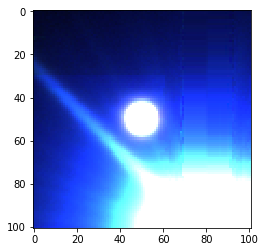

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


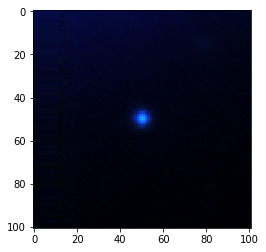

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


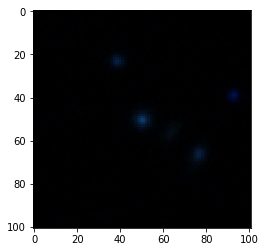

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


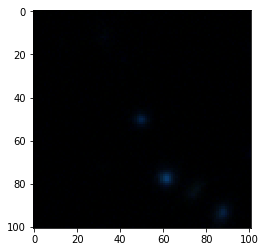

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


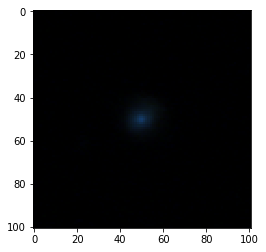

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


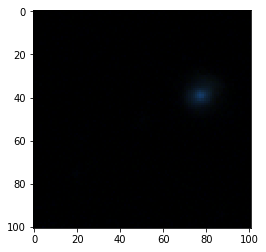

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


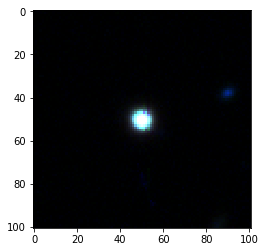

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


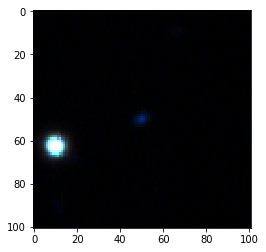

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


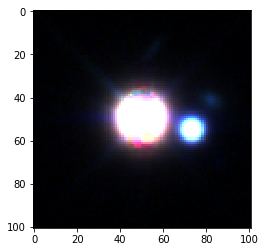

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


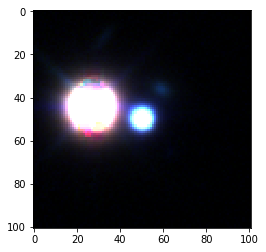

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


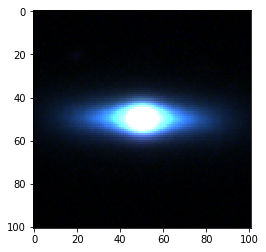

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


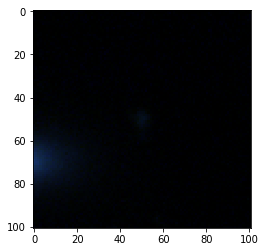

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


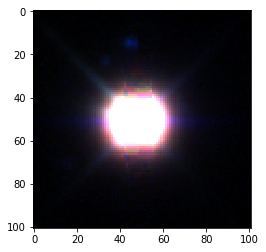

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


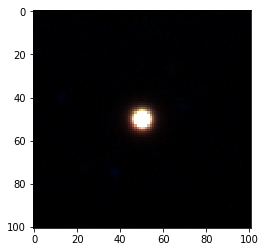

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


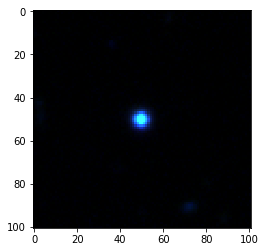

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


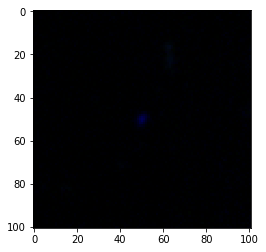

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


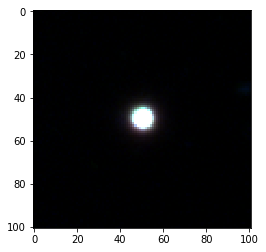

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


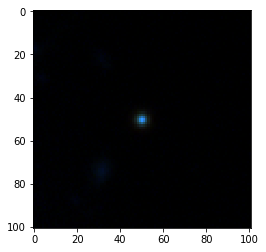

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


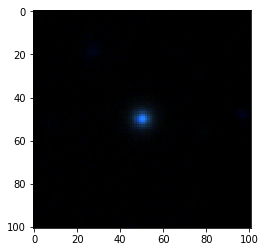

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


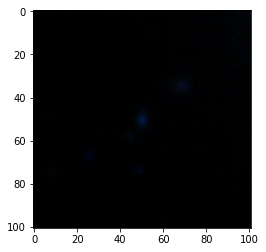

In [6]:
for i in images:
    plt.imshow(i.T)
    plt.show()